# Modelos

## Modelos mecánicos

La ley fundamental que rige el comportamiento de los sistemas mecánicos es la [Segunda ley de Newton o ley fundamental de la dinámica](https://es.wikipedia.org/wiki/Leyes_de_Newton#Segunda_ley_de_Newton_o_ley_fundamental_de_la_din%C3%A1mica).

$$Fuerza = Masa \cdot Aceleracion$$


Al analizar el siguiente sistema, puede encontrarse una representación matemática del comportamiento del mismo que relacione la fuerza $u(t)$ con la posición $x_1(t)$. 
![figuras/mecanico1.png](figuras/mecanico1.png)
- ¿Cuál es la entrada del sistema?
- ¿Cuál es la salida del sistema?

Observe que se tienen:
### Masas (Ley fundamental de la dinámica)
$$Fuerza = Masa \cdot Aceleracion$$

### Resortes (Ley de elasticidad de Hooke)
$$Fuerza = -ConstElastica \cdot Elongacion$$

### Amortiguador viscoso
$$Fuerza = -CoefFriccion \cdot Velocidad$$


Se infiere la ecuación de movimiento en la masa $m_1$:
- La fuerza de entrada $u$ empuja a la derecha.
- La masa reacciona con una fuerza igual a $m_1 \cdot \ddot{x_1}$
- El resorte 1 se estira y reacciona con una fuerza igual a $k_1 \cdot x_1$
- El resorte 2 se "comprime", respecto a $x_2$ y reacciona con una fuerza igual a $k_2 \cdot (x_1-x_2)$.
- El medio viscoso, respecto a $x_2$, reacciona con una fuerza igual a $b \cdot (\dot{x_1}- \dot{x_2})$.

$$m_1  \ddot{x}_1 + k_1  x_1 + k_2  (x_1-x_2) + b  (\dot{x_1}- \dot{x_2})  = u$$

Que se puede escribir como:

$$m_1  \ddot{x}_1 + b \dot{x_1} + (k_1  k_2) x_1  = b \dot{x_2} + k_2 x_2 + u$$


Se infiere la ecuación de movimiento en la masa $m_2$:
- La masa reacciona con una fuerza igual a $m_2 \cdot \ddot{x_2}$
- El resorte 3 se comprime y reacciona con una fuerza igual a $k_3 \cdot x_2$
- El resorte 2 se "estira", respecto a $x_1$ y reacciona con una fuerza igual a $k_2 \cdot (x_2-x_1)$.
- El medio viscoso, respecto a $x_1$, reacciona con una fuerza igual a $b \cdot (\dot{x}_2- \dot{x}_1)$.

$$m_2  \ddot{x}_2 + k_3  x_2 + k_2  (x_2-x_1) + b  (\dot{x}_2- \dot{x}_1)  = 0$$

Que se puede escribir como:

$$m_2  \ddot{x}_2 + b \dot{x}_2 + (k_2 + k_3)  x_2   = b \dot{x}_1 + k_2 x_1 $$


El sistema de ecuaciones que se tiene es:

$$m_1  \ddot{x}_1 + b \dot{x_1} + (k_1 + k_2) x_1  = b \dot{x_2} + k_2 x_2 + u$$
$$m_2  \ddot{x}_2 + b \dot{x}_2 + (k_2 + k_3)  x_2   = b \dot{x}_1 + k_2 x_1 $$

Considerando la transformada de Laplace y condiciones iniciales nulas se tiene:

$$m_1  s^2 X_1(s) + b s X_1(s) + (k_1 + k_2) X_1(s)  = b s X_2(s) + k_2 X_2(s) + U(s)$$
$$m_2  s^2 X_2(s) + b s X_2(s) + (k_2 + k_3) X_2(s)   = b sX_1(s) + k_2 X_1(s) $$

o

$$X_1(s) (m_1  s^2  + b s  + (k_1 + k_2) )  = X_2(s) (b s + k_2)+ U(s)$$
$$X_2(s) (m_2  s^2  + b s  + (k_2 + k_3) )  = X_1(s) (b s + k_2 ) $$

o

$$X_1(s) (m_1  s^2  + b s  + (k_1 + k_2) )  = X_1(s) \frac{ (b s + k_2 )}{(m_2  s^2  + b s  + (k_2 + k_3) )} (b s + k_2)+ U(s)$$


$$X_1(s) (m_1  s^2  + b s  + (k_1 + k_2)  -\frac{ (b s + k_2 )^2}{(m_2  s^2  + b s  + (k_2 + k_3) )} ) = U(s)$$


$$X_1(s) (m_1  s^2  + b s  + k_1 + k_2)(m_2  s^2  + b s  + k_2 + k_3 )  - (b s + k_2 )^2 ) = (m_2  s^2  + b s  + k_2 + k_3)U(s)$$


$$\frac{X_1(s)}{U(s)}  = \frac{m_2  s^2  + b s  + k_2 + k_3}{(m_1  s^2  + b s  + k_1 + k_2)(m_2  s^2  + b s  + k_2 + k_3 )  - (b s + k_2 )^2 }$$


In [13]:
import control
import sympy as sym
from sympy import poly
import matplotlib.pyplot as plt
%matplotlib inline
s = sym.symbols('s',complex = True)
m1,m2,k1,k2,k3,b = sym.symbols('m_1,m_2,k_1,k_2,k_3,b',real = True)
poly((m1*s**2+b*s+k1+k2)*
     (m2*s**2+b*s+k2+k3)-
     (b*s+k2)**2, s)

Poly(m_1*m_2*s**4 + (b*m_1 + b*m_2)*s**3 + (k_1*m_2 + k_2*m_1 + k_2*m_2 + k_3*m_1)*s**2 + (b*k_1 + b*k_3)*s + k_1*k_2 + k_1*k_3 + k_2*k_3, s, domain='ZZ[b,k_1,k_2,m_1,k_3,m_2]')

In [51]:
m1 = m2 = 1
k1 = k2 = k3 = 0.5
b = -0.5

In [52]:
num = [m2,b,k2+k3]
den = [m1*m2,
       b*(m1+m2),
       m1*(k2+k3) + m2*(k1+k2),
       b*(k1+k3),
       k1*k2 + k1*k3 + k2*k3
      ]
G = control.tf(num,den)
G

TransferFunction(array([ 1. , -0.5,  1. ]), array([ 1.  , -1.  ,  2.  , -0.5 ,  0.75]))

In [53]:
G.pole()

array([ 5.00000000e-01+1.11803399j,  5.00000000e-01-1.11803399j,
       -3.26128013e-16+0.70710678j, -3.26128013e-16-0.70710678j])

In [54]:
G.zero()

array([0.25+0.96824584j, 0.25-0.96824584j])

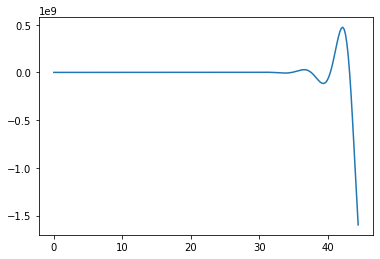

In [55]:
t,y = control.step_response(G);
plt.plot(t,y)

- Proponga un modelo en espacio de estados que considere como salidas a $x_1$ y $x_2$

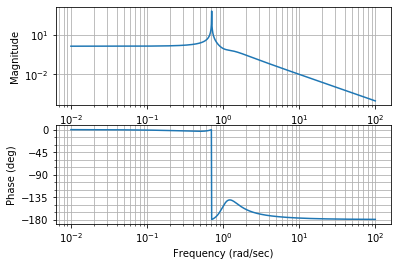

In [41]:
control.bode_plot(G);

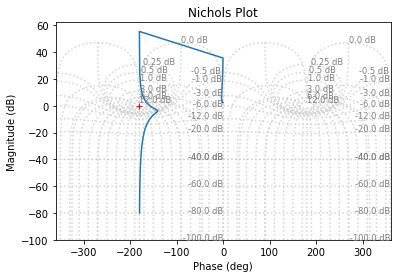

In [42]:
control.nichols_plot(G);

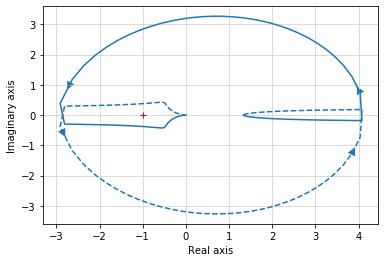

In [43]:
control.nyquist_plot(G);

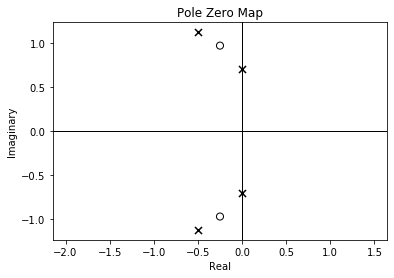

In [44]:
control.pzmap(G);

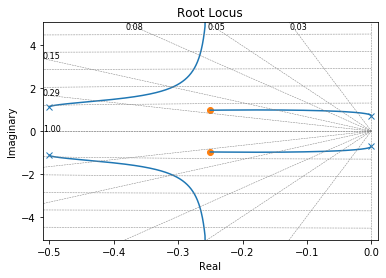

In [45]:
control.rlocus(G);

In [35]:
sym.__version__

'1.4'